In [4]:
import pandas as pd
import matplotlib.pyplot as plt

GROUND_TRUTH_CSV = '/mnt/aye-aye-sleep-monitoring/demo_data/may/pic_label.csv'
PREDICTION_TRUTH_CSV = '/home/behe/ASM_Classification/output/old_model_new_data_output.csv'

# Read CSV
groundTruthData = pd.read_csv(GROUND_TRUTH_CSV)
predictionData = pd.read_csv(PREDICTION_TRUTH_CSV)

In [5]:

# Split CSV so Frame Number gets in it's own column
groundTruthData[['splitText', 'frameNumberJPG']
                ] = groundTruthData.pic_name.str.split("frame_", expand=True)
groundTruthData[['frameNumber', 'JPG']
                ] = groundTruthData.frameNumberJPG.str.split(".jpg", expand=True)
predictionData[['splitText', 'frameNumberJPG']
               ] = predictionData.pic_name.str.split("frame_", expand=True)
predictionData[['frameNumber', 'JPG']
               ] = predictionData.frameNumberJPG.str.split(".jpg", expand=True)

# Convert to number type and Sort by Frame Number
groundTruthData["frameNumber"] = pd.to_numeric(groundTruthData["frameNumber"])
predictionData["frameNumber"] = pd.to_numeric(predictionData["frameNumber"])
groundTruthData = groundTruthData.sort_values(by=['frameNumber'])
predictionData = predictionData.sort_values(by=['frameNumber'])

# 3 means out of frame so label should be 0
# 2 means in frame so label should be 1
groundTruthData.loc[groundTruthData["label"] == 3, 'label'] = 0
groundTruthData.loc[groundTruthData["label"] == 2, 'label'] = 1

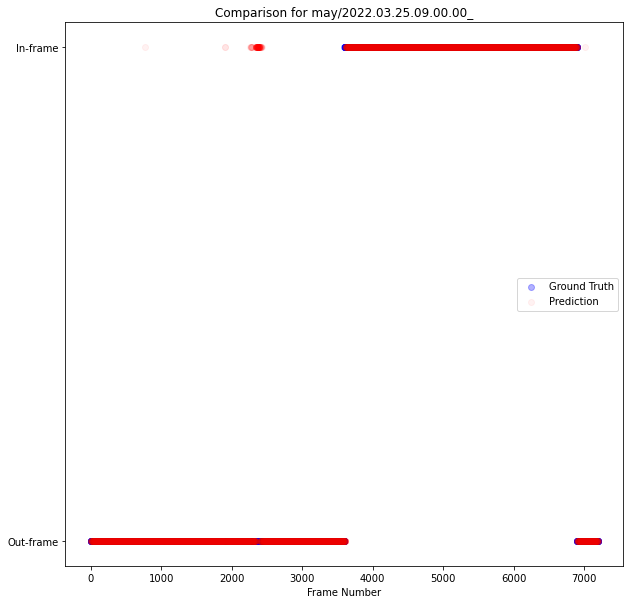

In [6]:
# Plot the graph
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(groundTruthData['frameNumber'], groundTruthData['label'],
            c='b', label='Ground Truth', alpha=0.3)
ax1.scatter(predictionData['frameNumber'], predictionData['label'],
            c='r', label='Prediction', alpha=0.05)
plt.yticks([0, 1], ['Out-frame', 'In-frame'])
plt.xlabel("Frame Number")
plt.title("Comparison for " + groundTruthData['splitText'][0])
plt.legend()
plt.show()